In [ ]:
import pandas as pd
import numpy as np
import sklearn
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import tensorflow as tf
import keras 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
!pip install catboost
!pip install scikit-learn
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.4 MB/s eta 0:00:00
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1u2rqYUyalvMWiOmwwjUIqJDgOYSR7U6j'}) # replace the id with id of file you want to access
downloaded.GetContentFile('alzheimer.csv') 

In [ ]:
data=pd.read_csv("/content/alzheimer.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=data.rename(columns={"Group":"Label"})

In [ ]:
si=SimpleImputer(strategy="most_frequent")
data[["SES","MMSE"]]=si.fit_transform(data[["SES","MMSE"]])

In [ ]:
X=data.drop("Label",axis=1)
y=data.Label

le=LabelEncoder()
y=le.fit_transform(y)

oe=LabelEncoder()
X["M/F"]=oe.fit_transform(X["M/F"])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.8,stratify=y)


In [ ]:
## xgboost 
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
pred_xgb=xgb.predict(x_test)
score_xgb=accuracy_score(y_test,pred_xgb)
## Lgbm 
lgbm=LGBMClassifier()
lgbm.fit(x_train,y_train)
pred_lgbm=lgbm.predict(x_test)
score_lgbm=accuracy_score(y_test,pred_lgbm)

## catboost
catboost=CatBoostClassifier()
catboost.fit(x_train,y_train)
pred_catboost=catboost.predict(x_test)
score_catboost=accuracy_score(y_test,pred_catboost)


## rfc
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
score_rfc=accuracy_score(y_test,pred_rfc)


Learning rate set to 0.074389
0:	learn: 1.0334362	total: 50ms	remaining: 49.9s
1:	learn: 0.9562108	total: 51.2ms	remaining: 25.5s
2:	learn: 0.8957832	total: 53.4ms	remaining: 17.8s
3:	learn: 0.8528608	total: 55.7ms	remaining: 13.9s
4:	learn: 0.8054637	total: 57.8ms	remaining: 11.5s
5:	learn: 0.7675853	total: 60ms	remaining: 9.93s
6:	learn: 0.7257593	total: 62.1ms	remaining: 8.81s
7:	learn: 0.6850389	total: 63.1ms	remaining: 7.82s
8:	learn: 0.6532391	total: 65.2ms	remaining: 7.17s
9:	learn: 0.6300342	total: 67.4ms	remaining: 6.67s
10:	learn: 0.6045512	total: 69.5ms	remaining: 6.25s
11:	learn: 0.5804453	total: 71.7ms	remaining: 5.9s
12:	learn: 0.5603432	total: 73.8ms	remaining: 5.6s
13:	learn: 0.5392457	total: 75.9ms	remaining: 5.34s
14:	learn: 0.5192694	total: 77.9ms	remaining: 5.12s
15:	learn: 0.5033941	total: 80ms	remaining: 4.92s
16:	learn: 0.4885432	total: 82.2ms	remaining: 4.75s
17:	learn: 0.4751093	total: 84.4ms	remaining: 4.61s
18:	learn: 0.4619668	total: 86.5ms	remaining: 4.47s


In [ ]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20, activation="relu",input_shape=(9,)))
model.add(tf.keras.layers.Dense(10,activation="relu"))
model.add(tf.keras.layers.Dense(3,activation="softmax"))

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

model.fit(x_train,y_train,batch_size=32,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
10/10 [==============================] - 2s 51ms/step - loss: 32.3738 - accuracy: 0.4295 - val_loss: 22.7167 - val_accuracy: 0.3867
Epoch 2/100
10/10 [==============================] - 0s 40ms/step - loss: 17.1218 - accuracy: 0.5034 - val_loss: 14.7807 - val_accuracy: 0.4800
Epoch 3/100
10/10 [==============================] - 0s 26ms/step - loss: 11.4286 - accuracy: 0.4060 - val_loss: 9.1393 - val_accuracy: 0.4800
Epoch 4/100
10/10 [==============================] - 0s 49ms/step - loss: 6.5052 - accuracy: 0.4799 - val_loss: 4.7974 - val_accuracy: 0.4267
Epoch 5/100
10/10 [==============================] - 1s 60ms/step - loss: 3.6589 - accuracy: 0.3557 - val_loss: 3.6198 - val_accuracy: 0.4667
Epoch 6/100
10/10 [==============================] - 1s 89ms/step - loss: 2.9620 - accuracy: 0.4430 - val_loss: 2.7363 - val_accuracy: 0.4133
Epoch 7/100
10/10 [==============================] - 0s 39ms/step - loss: 2.4155 - accuracy: 0.4060 - val_loss: 2.6765 - val_accuracy: 0.4667
E

In [ ]:
from vecstack import stacking
models = [XGBClassifier(),
          LGBMClassifier(),
         RandomForestClassifier()]

# Get your stacked features in a single line
S_train, S_test = stacking(models, x_train, y_train, x_test, regression=False ,shuffle=True)

lr=LogisticRegression()

lr.fit(S_train,y_train)
pred_stack=lr.predict(S_test)
score_stack=accuracy_score(y_test,pred_stack)


/usr/local/lib/python3.9/dist-packages/vecstack/core.py:615: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  S_test[:, model_counter] = st.mode(S_test_temp, axis = 1)[0].ravel()
/usr/local/lib/python3.9/dist-packages/vecstack/core.py:615: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

In [ ]:
!pip install vecstack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19879 sha256=ba4721f200c91318072d6c41a511614f062cfe92656daf02c12e0ee4f05ccdf1
  Stored in directory: /root/.cache/pip/wheels/7e/ee/d6/47cb94a403bc544de1433986e5530d6b0498021098fbe43aa1
Successfully built vecstack


In [ ]:
print("XGBoost accuracy:",score_xgb)
print("LGBM accuracy:",score_lgbm)
print("CatBoost accuracy:",score_catboost)
print("RFC accuracy:",score_rfc)
print("Stack accuracy:",score_stack)

XGBoost accuracy: 0.9333333333333333
LGBM accuracy: 0.96
CatBoost accuracy: 0.9466666666666667
RFC accuracy: 0.9333333333333333
Stack accuracy: 0.8933333333333333


<BarContainer object of 4 artists>

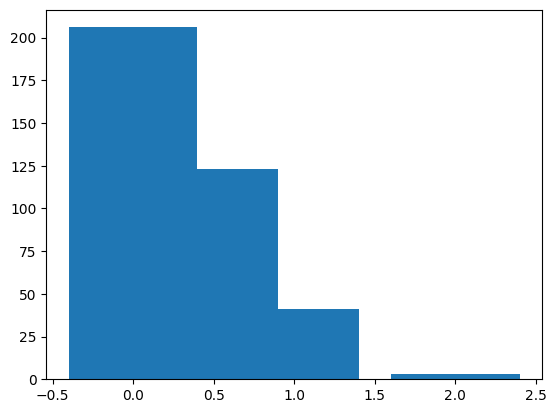

In [ ]:
plt.bar(data['CDR'].unique(),data['CDR'].value_counts())

In [ ]:
import pandas_profiling as pp
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

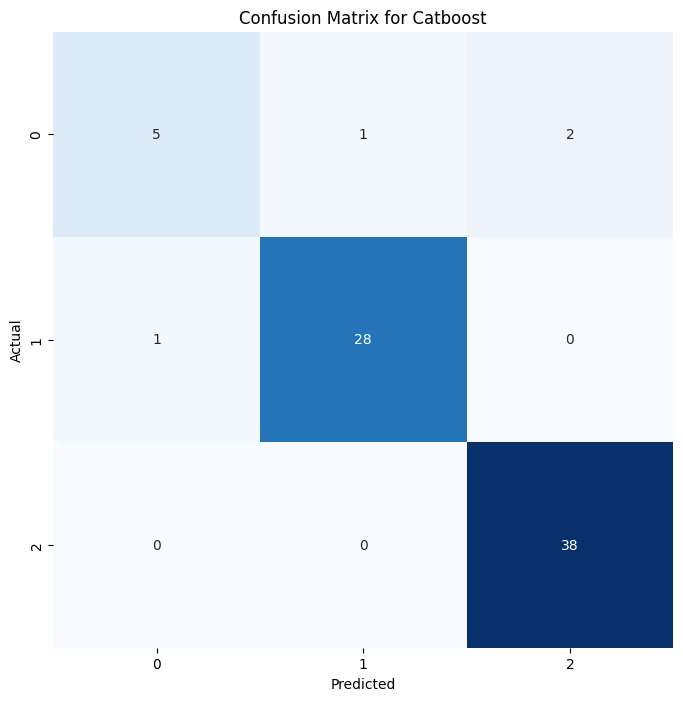

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.83      0.62      0.71         8
           1       0.97      0.97      0.97        29
           2       0.95      1.00      0.97        38

    accuracy                           0.95        75
   macro avg       0.92      0.86      0.88        75
weighted avg       0.94      0.95      0.94        75



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
y_pred = catboost.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0,vmax=1, fmt='g', cbar=False, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Catboost")
plt.show()

print("Classification Report:\n----------------------\n", clr)